## Data Cleaning and EDA on Tripavisor Hotels Reviews

In [2]:
import pandas as pd
import seaborn as sns

In [4]:
df_1 = pd.read_csv('five_hotels.csv')
df_2 = pd.read_csv('last_hotels.csv')
# concatenate the two datasets
df = pd.concat([df_1, df_2])
# reseting index
df = df.reset_index(drop=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25050 entries, 0 to 25049
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviews        25050 non-null  object
 1   review_rating  25050 non-null  int64 
 2   user           25050 non-null  object
dtypes: int64(1), object(2)
memory usage: 587.2+ KB


In [6]:
# checking for null values
df.isna().sum()

reviews          0
review_rating    0
user             0
dtype: int64

In [8]:
# checking for duplicates 
df.nunique()

reviews          25049
review_rating        5
user             22205
dtype: int64

- The df has one duplicated review and a few users that have more than one review.

## Create a feature with the names of hotels


In [12]:
names_hotel = pd.Series(['Park_Lane', 'Hilton_Garden_Inn', 'Hudson' , 'Wellington', 'Wellington_Hotel2' , 'Novotel', 'Stewart', 'Sofitel', 'Arthouse' , 'Park_Central_Hotel'])

repeat_names_hotel = names_hotel.repeat(2505).reset_index()

df['hotel_name'] = repeat_names_hotel.drop(columns='index')

# convert hotel_names into categoris for memory optimization
df['hotel_name'] = df['hotel_name'].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25050 entries, 0 to 25049
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   reviews        25050 non-null  object  
 1   review_rating  25050 non-null  int64   
 2   user           25050 non-null  object  
 3   hotel_name     25050 non-null  category
dtypes: category(1), int64(1), object(2)
memory usage: 612.1+ KB


# EDA

### Inspecting the hotel raings

In [7]:
# remove zero from review_rating
df['review_rating'] = df['review_rating'].apply(lambda x : x // 10)

In [8]:
df['review_rating'].value_counts(normalize = True)

5    0.474172
4    0.264351
3    0.122715
1    0.069501
2    0.069261
Name: review_rating, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

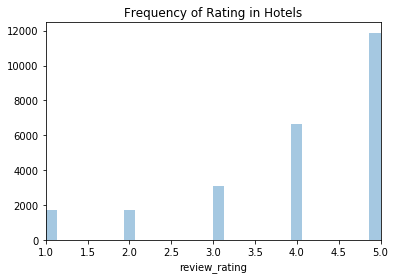

In [14]:

plot = sns.distplot(df['review_rating'] ,kde=False).set(xlim=(1,5))
plt.title("Frequency of Rating in Hotels")
plt.show()


In [15]:
df['review_rating'].describe()

count    25050.000000
mean         4.004431
std          1.224533
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: review_rating, dtype: float64

- Most of the reviews have possitive reviews according to the ratings. Not many hotels have negative reviews. The average of the rating reviews are 4.

### Inspencting users 

In [16]:
df['user'].value_counts()

Mark C        13
Lisa H        12
John B        12
David B       11
Michelle M    11
              ..
MarixuRPM      1
Nailah N       1
ljbayer        1
Irene M        1
sweer73        1
Name: user, Length: 22205, dtype: int64

In [17]:
df['user'].value_counts().describe()

count    22205.000000
mean         1.128124
std          0.557393
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         13.000000
Name: user, dtype: float64

- There are 22205 unique reviews in the dataframe which is quite diverse. The average user has contributed with 1 review to the dataframe. The top reviews (Marck C) has contributed 13 reviews.

### Inspecting reviews

In [18]:
df['reviews_len'] = df['reviews'].apply(lambda x : len(x))
#df['reviews'].str.len()

In [29]:
print('mean:', df.reviews_len.mean())
print('std:', df.reviews_len.std())
print('max:', df.reviews_len.max())
print('min:', df.reviews_len.min())

mean: 469.3043113772455
std: 219.0262215747896
max: 2535
min: 195


- The maximum number of characters in a review is 2535 and the minimum number is 195. The average length of characters in a review is 469.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

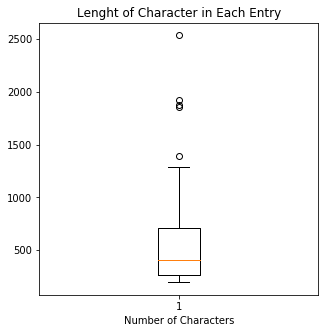

In [40]:
# I can see the overall distribution of length of strings in each entry.

fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df['reviews_len'])
plt.title("Lenght of Character in Each Entry")
plt.xlabel('Number of Characters')
plt.show()

- From the above box plot, some of the reviews are way more than 2000 characters long with the maximun of 2500 charcters.

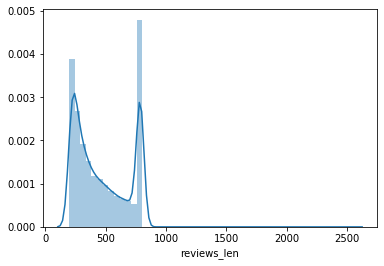

In [23]:
sns.distplot(df['reviews_len'])
